In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [4]:
amazon_reviews = pd.read_csv('final_processed_data.csv')

In [6]:
amazon_reviews.drop(columns=['textblob_polarity', 'textblob_sentiment', 'emotion'], inplace=True)

In [7]:
amazon_reviews.head()

product_title product_category  \
0  Panasonic RF-P50 Pocket AM/FM Radio, Silver (D...      Electronics   
1  Symphonized NRG Premium Genuine Wood In-ear No...      Electronics   
2  Samsung AA59-00784C Replace Remote sub AA59-00...      Electronics   
3    Lenovo DVI Cable Single Link/Monitors (45J7915)      Electronics   
4  Mediasonic Homeworx HW110AN Super Thin Indoor ...      Electronics   

   star_rating  helpful_votes  \
0          4.0            6.0   
1          5.0            0.0   
2          5.0            0.0   
3          5.0            0.0   
4          1.0            0.0   

                                         review_body  \
0  I didn't want to spend a lot of money for a sm...   
1  Solid earbuds.  The mic is fine for calls.  Th...   
2                                              Great   
3  Heavy gauge on the cable makes it feel like a ...   
4  Bought this for regular cable and only receive...   

                              normalized_review_body  \
0  nt want spend lot money small portable radio s...   
1  solid earbuds   mic fine calls   cord sturdier...   
2                                              great   
3  heavy gauge cable makes feel like heavy duty a...   
4  bought regular cable received channel set 5 ft...   

   review_body_compound_score review_body_sentiment_label  nltk_sentiment  
0                      0.3549                    positive          0.3549  
1                      0.3400                    positive          0.3400  
2                      0.6249                    positive          0.6249  
3                      0.7717                    positive          0.7717  
4                      0.6908                    positive          0.6908

In [8]:
from sklearn.model_selection import train_test_split
from textblob import TextBlob

def get_sentiment_label(polarity):
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

train_data, test_data = train_test_split(amazon_reviews, test_size=0.2, random_state=42)

train_data['textblob_polarity'] = train_data['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

train_data['textblob_sentiment'] = train_data['textblob_polarity'].apply(get_sentiment_label)

test_data['textblob_polarity'] = test_data['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

test_data['textblob_sentiment'] = test_data['textblob_polarity'].apply(get_sentiment_label)


In [9]:
# Count misclassifications
misclassified = (test_data['review_body_sentiment_label'] != test_data['textblob_sentiment']).sum()

# Calculate misclassification rate
misclassification_rate = misclassified / len(test_data)

print("Number of misclassifications:", misclassified)
print("Misclassification rate:", misclassification_rate)


Number of misclassifications: 44552
Misclassification rate: 0.1969715056259257


Accuracy: 80.30%


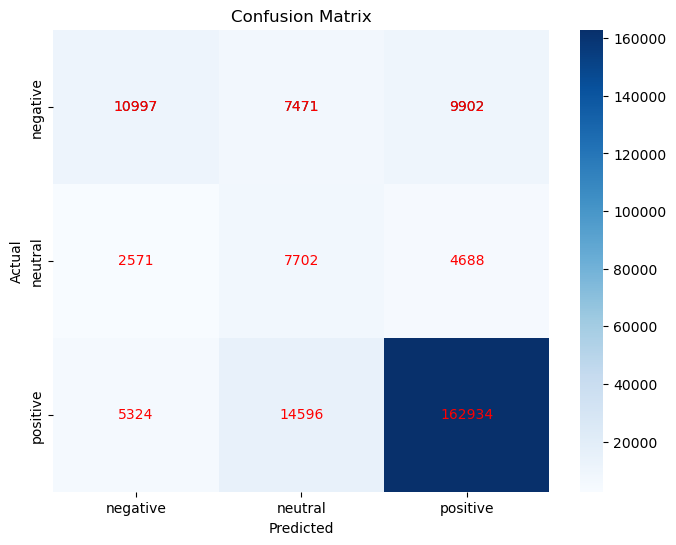

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(test_data['review_body_sentiment_label'], test_data['textblob_sentiment'])

# Calculate accuracy
accuracy = (conf_matrix.diagonal().sum() / conf_matrix.sum()) * 100
print("Accuracy: {:.2f}%".format(accuracy))


# Plot confusion matrix with annotations for all cells
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])

# Annotate all cells
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j+0.5, i+0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [18]:
from sklearn.metrics import classification_report
class_report_textblob = classification_report(test_data['review_body_sentiment_label'], test_data['textblob_sentiment'], target_names=['negative', 'neutral', 'positive'])

print("Classification Report for TextBlob Sentiment Analysis:")
print(class_report_textblob)


Classification Report for TextBlob Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.58      0.39      0.47     28370
     neutral       0.26      0.51      0.34     14961
    positive       0.92      0.89      0.90    182854

    accuracy                           0.80    226185
   macro avg       0.59      0.60      0.57    226185
weighted avg       0.83      0.80      0.81    226185



In [31]:
misclassified_rows = test_data[test_data['review_body_sentiment_label'] != test_data['textblob_sentiment']]

print("Some misclassified rows:\n")
for index, row in misclassified_rows[['review_body', 'review_body_sentiment_label', 'textblob_sentiment']].head(20).iterrows():
    print(row['review_body'])
    print("\033[1mActual:\033[0m", row['review_body_sentiment_label'], "\033[1mPredicted:\033[0m", row['textblob_sentiment'])
    print()

Some misclassified rows:

I have had the Body Back Buddy for a while now and really like it.  But what really motivated my review was that over the weekend I really wrenched up my back playing sports and using the Body Back Buddy really helped loosen up my overly tight muscles.  This morning I could hardly tie my shoes, now I am feeling so much better.  I have foam rollers, lacrosse balls and stretch bands and nothing worked as well as this device (all useful though).  The only downside is it is a bit big, so travelling with it is difficult, but it is the size that allows you to get the leverage you need to work on your back.
Actual: positive Predicted: neutral

These TF glasses are awesome, truly awesome. They are stylish enough to be trendy but subtle enough to remain classy. Unfortunately, mine arrived with a cracked demo lens. I know it's only the demo lens but the crack it where the nose piece touches the frame rim. I don't know whether this is a defect in this specific pair, a kn

In [20]:
import pandas as pd
from nrclex import NRCLex


# Function to get emotion scores for each review
def get_emotion_scores(text):
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores

# Apply the function to each review in the dataframe
amazon_reviews['emotion'] = amazon_reviews['review_body'].apply(get_emotion_scores)


In [21]:
amazon_reviews.head()

product_title product_category  \
0  Panasonic RF-P50 Pocket AM/FM Radio, Silver (D...      Electronics   
1  Symphonized NRG Premium Genuine Wood In-ear No...      Electronics   
2  Samsung AA59-00784C Replace Remote sub AA59-00...      Electronics   
3    Lenovo DVI Cable Single Link/Monitors (45J7915)      Electronics   
4  Mediasonic Homeworx HW110AN Super Thin Indoor ...      Electronics   

   star_rating  helpful_votes  \
0          4.0            6.0   
1          5.0            0.0   
2          5.0            0.0   
3          5.0            0.0   
4          1.0            0.0   

                                         review_body  \
0  I didn't want to spend a lot of money for a sm...   
1  Solid earbuds.  The mic is fine for calls.  Th...   
2                                              Great   
3  Heavy gauge on the cable makes it feel like a ...   
4  Bought this for regular cable and only receive...   

                              normalized_review_body  \
0  nt want spend lot money small portable radio s...   
1  solid earbuds   mic fine calls   cord sturdier...   
2                                              great   
3  heavy gauge cable makes feel like heavy duty a...   
4  bought regular cable received channel set 5 ft...   

   review_body_compound_score review_body_sentiment_label  nltk_sentiment  \
0                      0.3549                    positive          0.3549   
1                      0.3400                    positive          0.3400   
2                      0.6249                    positive          0.6249   
3                      0.7717                    positive          0.7717   
4                      0.6908                    positive          0.6908   

                                             emotion  
0  {'anger': 2, 'anticipation': 2, 'joy': 1, 'pos...  
1  {'anticipation': 1, 'negative': 2, 'trust': 2,...  
2                                                 {}  
3                                    {'surprise': 1}  
4                     {'surprise': 1, 'positive': 1}

In [22]:
amazon_reviews.to_csv('final_processed_data.csv', index = False)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for rating in range(1, 6):
    reviews_for_rating = amazon_reviews[amazon_reviews['star_rating'] == rating]['normalized_review_body']
    
    text_for_wordcloud = ' '.join(reviews_for_rating)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Rating {rating}')
    plt.axis('off')
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nirmitsachde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


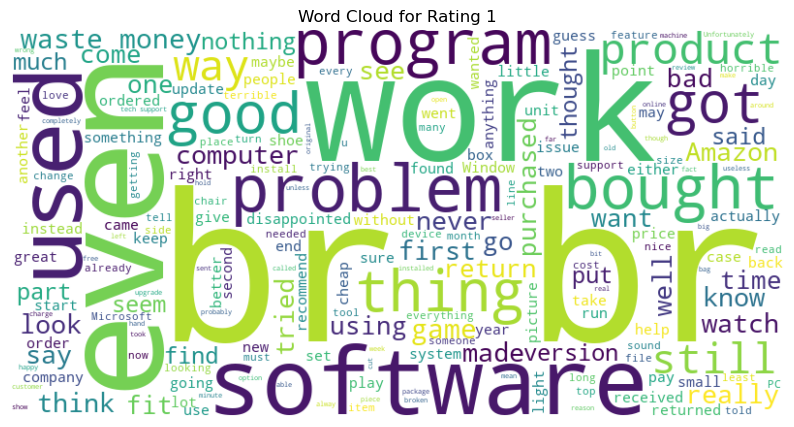

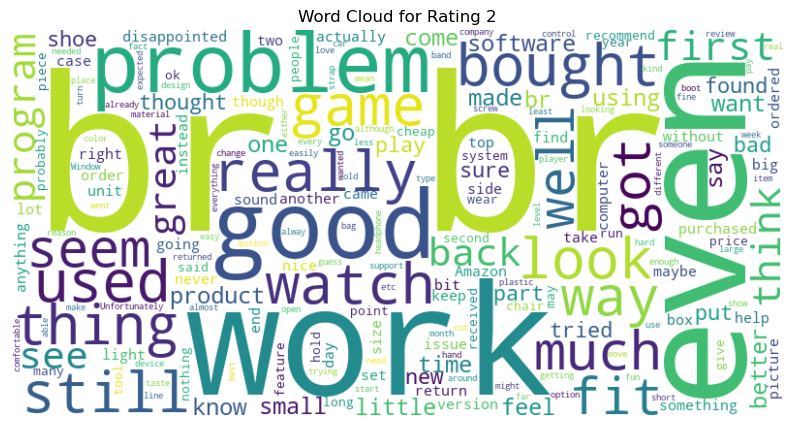

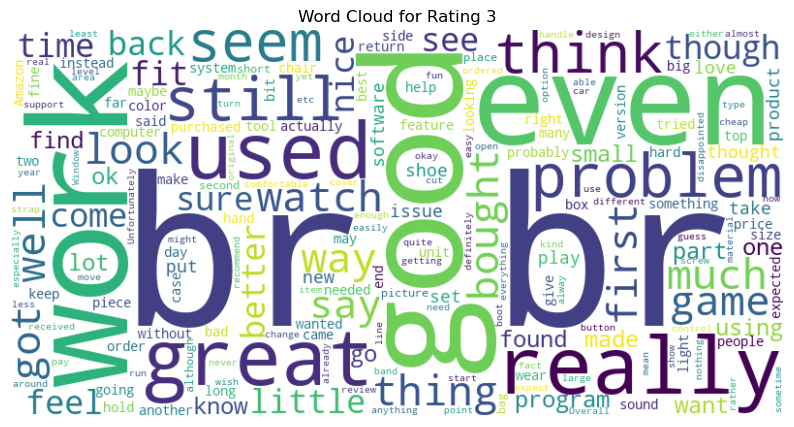

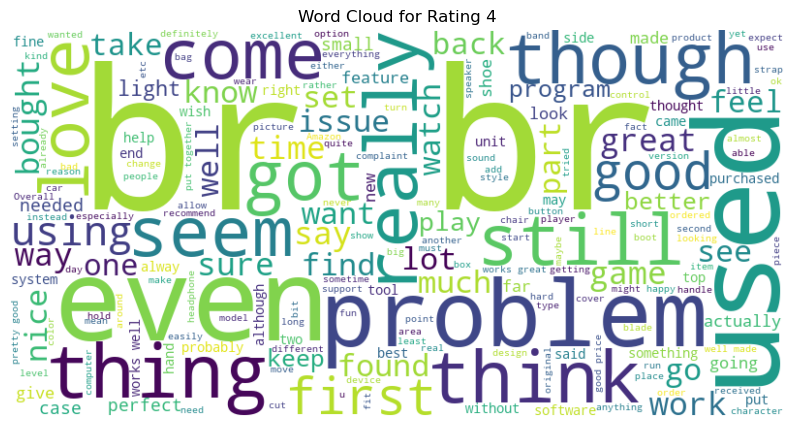

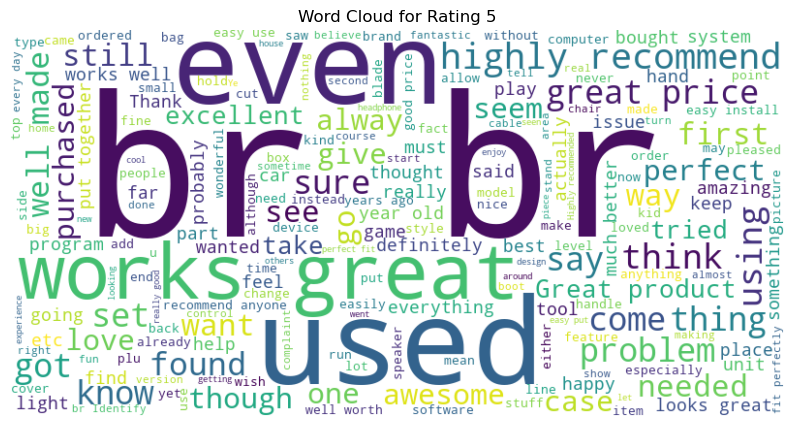

In [33]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

additional_stop_words = {'product', 'service', 'item', 'time', 'br', 'make', 'b r', 'br br', 'b', 'r', 'one', 'game', 'product', 'use', 'need', "buy", "purchase", "try", "quality"}

# Combine NLTK stopwords with additional stopwords
stop_words.update(additional_stop_words)

# Filter reviews for each rating level
for rating in range(1, 6):
    # Filter reviews for the current rating level
    reviews_for_rating = amazon_reviews[amazon_reviews['star_rating'] == rating]['review_body']
    
    # Combine all reviews into a single text for the word cloud
    text_for_wordcloud = ' '.join(reviews_for_rating)
    
    # Remove stopwords from the text
    cleaned_text = ' '.join([word for word in text_for_wordcloud.split() if word.lower() not in stop_words])
    
    # Create and generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Rating {rating}')
    plt.axis('off')
    plt.show()


In [34]:
amazon_reviews['star_rating'].value_counts()

star_rating
5.0    670261
4.0    194588
1.0    111654
3.0     93391
2.0     61030
Name: count, dtype: int64

In [74]:
def map_star_rating_to_sentiment(rating):
    if rating == 1:
        return "negative"
    elif rating in [4, 5]:
        return "positive"
    else:
        # Randomly assign negative or neutral sentiment for ratings 2 and 3
        return np.random.choice(["negative", "neutral"])

amazon_reviews['rating_sentiment'] = amazon_reviews['star_rating'].apply(map_star_rating_to_sentiment)


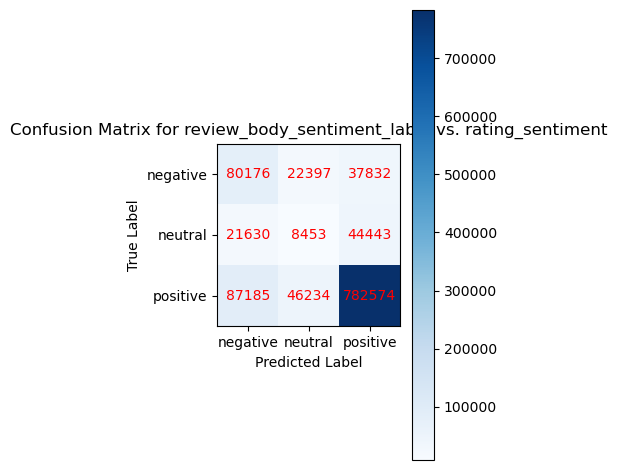


Classification Report for review_body_sentiment_label vs. rating_sentiment:
               precision    recall  f1-score   support

    negative       0.42      0.57      0.49    140405
     neutral       0.11      0.11      0.11     74526
    positive       0.90      0.85      0.88    915993

    accuracy                           0.77   1130924
   macro avg       0.48      0.51      0.49   1130924
weighted avg       0.79      0.77      0.78   1130924



In [76]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

conf_matrix_review_rating = confusion_matrix(amazon_reviews['review_body_sentiment_label'], amazon_reviews['rating_sentiment'])
class_report_review_rating = classification_report(amazon_reviews['review_body_sentiment_label'], amazon_reviews['rating_sentiment'], target_names=['negative', 'neutral', 'positive'])


plt.subplot(1, 2, 2)
plt.title('Confusion Matrix for review_body_sentiment_label vs. rating_sentiment')
plt.imshow(conf_matrix_review_rating, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1, 2], ['negative', 'neutral', 'positive'])
plt.yticks([0, 1, 2], ['negative', 'neutral', 'positive'])
for i in range(conf_matrix_review_rating.shape[0]):
    for j in range(conf_matrix_review_rating.shape[1]):
        plt.text(j, i, conf_matrix_review_rating[i, j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()

print("\nClassification Report for review_body_sentiment_label vs. rating_sentiment:\n", class_report_review_rating)


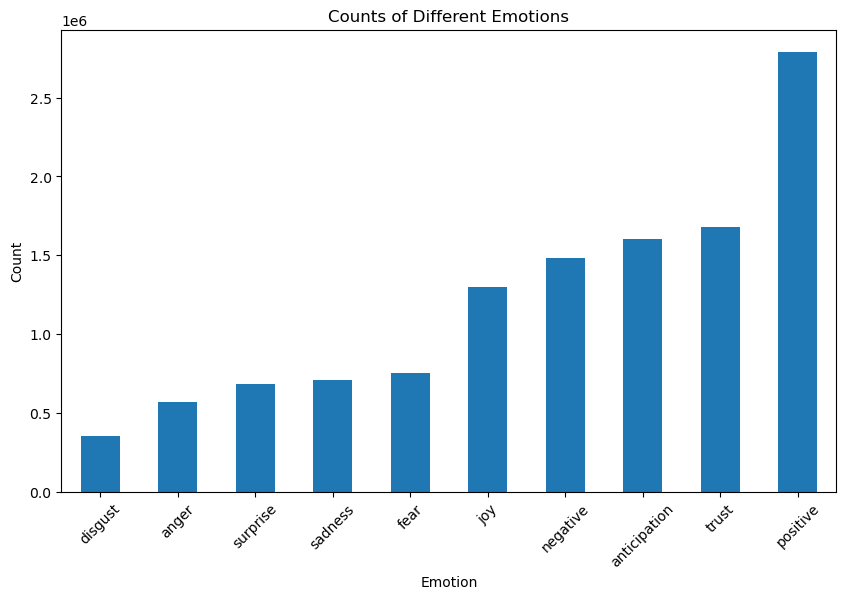

In [37]:
import seaborn as sns
amazon_reviews_emotions = pd.json_normalize(amazon_reviews['emotion'])

plt.figure(figsize=(10, 6))
amazon_reviews_emotions.sum().sort_values().plot(kind='bar')
plt.title('Counts of Different Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

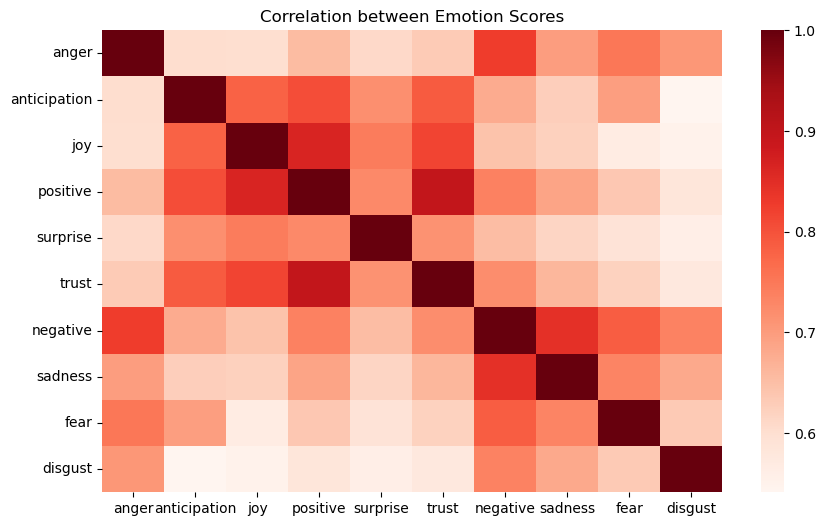

In [38]:
plt.figure(figsize=(10, 6))

# Generate the heatmap with all cells annotated
sns.heatmap(amazon_reviews_emotions.corr(), cmap='Reds')

# Set the title of the plot
plt.title('Correlation between Emotion Scores')

# Display the plot
plt.show()

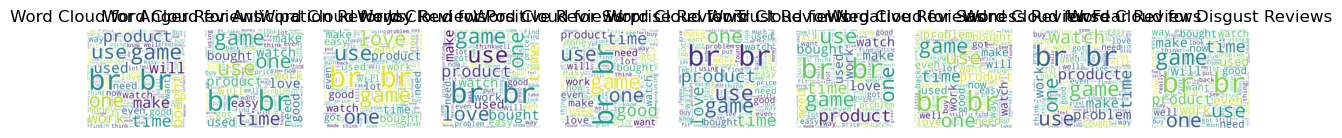

In [39]:
# Combine reviews for each emotion category
emotions_reviews = {}
for index, row in amazon_reviews.iterrows():
    if not row['emotion']:
        continue 
    emotion_dict = row['emotion']
    for emotion, count in emotion_dict.items():
        if emotion not in emotions_reviews:
            emotions_reviews[emotion] = []
        emotions_reviews[emotion].append(row['review_body'])

# Plot word clouds for each emotion category
plt.figure(figsize=(15, 10))
num_emotions = len(emotions_reviews)
for i, (emotion, reviews) in enumerate(emotions_reviews.items(), 1):
    emotion_reviews = ' '.join(reviews)
    plt.subplot(1, num_emotions, i)
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(emotion_reviews)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {emotion.capitalize()} Reviews')
    plt.axis('off')

plt.show()


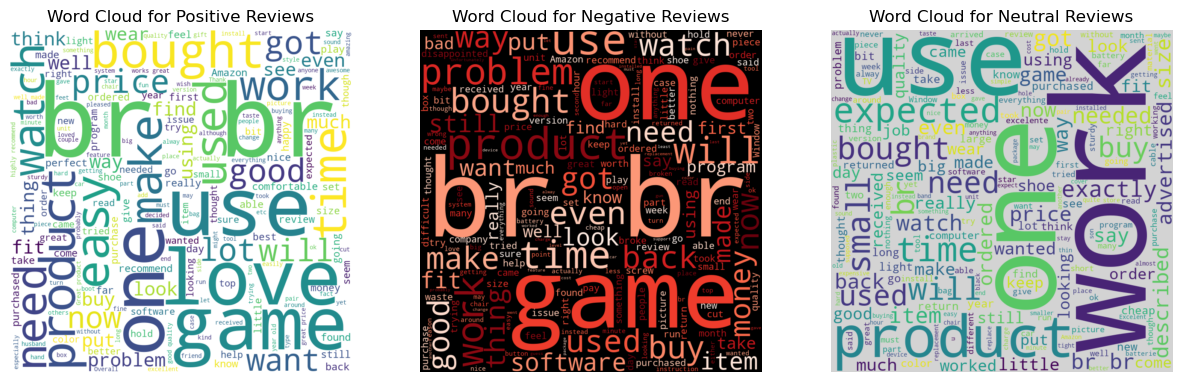

In [40]:
positive_reviews = ' '.join(amazon_reviews[amazon_reviews['review_body_sentiment_label'] == 'positive']['review_body'])
negative_reviews = ' '.join(amazon_reviews[amazon_reviews['review_body_sentiment_label'] == 'negative']['review_body'])
neutral_reviews = ' '.join(amazon_reviews[amazon_reviews['review_body_sentiment_label'] == 'neutral']['review_body'])

# Generate Word Clouds
plt.figure(figsize=(15, 5))

# Word Cloud for Positive Reviews
plt.subplot(1, 3, 1)
wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

# Word Cloud for Negative Reviews
plt.subplot(1, 3, 2)
wordcloud_negative = WordCloud(width=800, height=800, background_color='black', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

# Word Cloud for Neutral Reviews
plt.subplot(1, 3, 3)
wordcloud_neutral = WordCloud(width=800, height=800, background_color='lightgrey').generate(neutral_reviews)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')

plt.show()

# Unique products and product categories in the dataset

In [41]:
unique_product_categories = amazon_reviews["product_category"].unique()
total_unique_products = amazon_reviews["product_title"].unique().shape[0]

print(f"Total number of unique products in dataset: {total_unique_products}")
print(f"Total number of unique product categories in dataset: {unique_product_categories.shape[0]}")

for index, product_category in enumerate(unique_product_categories):
    print(f"{index + 1}. {product_category}")

Total number of unique products in dataset: 463528
Total number of unique product categories in dataset: 12
1. Electronics
2. Automotive
3. Tools
4. Shoes
5. Video Games
6. Grocery
7. Personal_Care_Appliances
8. Sports
9. Apparel
10. Software
11. Furniture
12. Watches


# Aggregation statistics via grouping by product category

In [42]:
amazon_reviews.groupby(by="product_category").agg({
    "star_rating": "mean",
    "review_body_compound_score": "mean",
    "helpful_votes": "mean"
})

star_rating  review_body_compound_score  \
product_category                                                    
Apparel                      4.106968                    0.569039   
Automotive                   4.247274                    0.484083   
Electronics                  4.038221                    0.500570   
Furniture                    4.084768                    0.556738   
Grocery                      4.313400                    0.581397   
Personal_Care_Appliances     3.977236                    0.466586   
Shoes                        4.240021                    0.602486   
Software                     3.563895                    0.447955   
Sports                       4.228284                    0.532467   
Tools                        4.266768                    0.485176   
Video Games                  4.056032                    0.547894   
Watches                      4.136516                    0.557433   

                          helpful_votes  
product_category                         
Apparel                        0.947642  
Automotive                     0.988600  
Electronics                    1.844653  
Furniture                      2.507663  
Grocery                        1.593695  
Personal_Care_Appliances       3.351520  
Shoes                          0.879789  
Software                       4.332179  
Sports                         1.389989  
Tools                          1.812968  
Video Games                    2.234979  
Watches                        1.183937

Note: Positively meant sentiment scores are typically >= 0.05

It seems that most product categories in this dataset, are heavily positively biased. This is shown by the consistent mean positive sentiment compound scores, and the high star ratings which are mostly greater than 4.0. The only outlier to this fact would be the 3.97 mean star rating for the personal care appliances product category group.

There doesn't seem to be anything useful we can do with the mean number of helpful votes, as the mean ranges seem to be relatively low.

# Aggregation statistics via grouping by product category and the sentiment label itself


ote: The sentiment label is a string between 3 options: positive, negative and neutral

In [43]:
amazon_reviews.groupby(by=["product_category", "review_body_sentiment_label"]).agg({
    "star_rating": "mean",
    "review_body_compound_score": "mean",
    "helpful_votes": "mean"
})

star_rating  \
product_category         review_body_sentiment_label                
Apparel                  negative                        2.290520   
                         neutral                         3.241231   
                         positive                        4.375392   
Automotive               negative                        2.733950   
                         neutral                         3.845878   
                         positive                        4.525374   
Electronics              negative                        2.385250   
                         neutral                         3.528069   
                         positive                        4.380706   
Furniture                negative                        2.223412   
                         neutral                         3.356875   
                         positive                        4.410084   
Grocery                  negative                        2.502551   
                         neutral                         3.817118   
                         positive                        4.549133   
Personal_Care_Appliances negative                        2.524866   
                         neutral                         3.446792   
                         positive                        4.334238   
Shoes                    negative                        2.537019   
                         neutral                         3.509752   
                         positive                        4.462434   
Software                 negative                        2.027675   
                         neutral                         3.298267   
                         positive                        3.968016   
Sports                   negative                        2.642332   
                         neutral                         3.696677   
                         positive                        4.490047   
Tools                    negative                        2.886883   
                         neutral                         3.965793   
                         positive                        4.512941   
Video Games              negative                        2.496017   
                         neutral                         3.688645   
                         positive                        4.339429   
Watches                  negative                        2.312359   
                         neutral                         3.547061   
                         positive                        4.429755   

                                                      review_body_compound_score  \
product_category         review_body_sentiment_label                               
Apparel                  negative                                      -0.439895   
                         neutral                                        0.000111   
                         positive                                       0.726091   
Automotive               negative                                      -0.450599   
                         neutral                                        0.000033   
                         positive                                       0.682180   
Electronics              negative                                      -0.492692   
                         neutral                                       -0.000016   
                         positive                                       0.724458   
Furniture                negative                                      -0.508465   
                         neutral                                        0.000018   
                         positive                                       0.750995   
Grocery                  negative                                      -0.476221   
                         neutral                                        0.000081   
                         positive                                       0.738553   
Per


This data frame is telling a much better picture, of how sentiment scores and labelling may impact the star rating of a particular review.

Recall from the Vader documentation for compound scores:

Score >= 0.05: Positive

-0.05 < Score < 0.05: Neutral

Score <= -0.05: Negative

If we inspect the mean compound scores, it seems that all of them make logical sense, according to this reasoning from the documentation. Negative sentiment groups had mean star ratings of around 2.5, neutral sentiment groups had mean star ratings of about 3.5, and positive sentiment groups had mean star ratings of approximately 4.5.

It is common sense that these three categories of sentiments can be associated with ratings of around those values, so our sentiment generations are pretty accurate to the reality of leaving reviews.

There is clearly a correlation between a review's sentiment label/score to the final star rating, given by a customer for products listed on their online store page.

# Find the products with both the highest star rating and sentiment compound scores

In [44]:
amazon_reviews.groupby(by=["product_title", "product_category", "review_body_sentiment_label"]).agg({
    "star_rating": "max",
    "review_body_compound_score": "max"
}).sort_values(by=["star_rating", "review_body_compound_score"], ascending=False).head(n=100)

star_rating  \
product_title                                      product_category review_body_sentiment_label                
Corel PaintShop Pro X4 Ultimate [Old Version]      Software         positive                             5.0   
Corel Photo and Video Pro X4 Ultimate Bundle [O... Software         positive                             5.0   
Halo: The Master Chief Collection                  Video Games      positive                             5.0   
Numi Organic Herbal Tea, Tea Bags                  Grocery          positive                             5.0   
PaintShop Pro X5                                   Software         positive                             5.0   
...                                                                                                      ...   
Lotus Domino R5 System Administration Curriculu... Software         positive                             5.0   
Madden NFL 13                                      Video Games      positive                             5.0   
Marantz AV8801 11.2 Channel Home Theater Pre-Am... Electronics      positive                             5.0   
Mass Effect 2                                      Video Games      positive                             5.0   
Math Missions: The Race to Spectacle City Arcad... Software         positive                             5.0   

                                                                                                 review_body_compound_score  
product_title                                      product_category review_body_sentiment_label                              
Corel PaintShop Pro X4 Ultimate [Old Version]      Software         positive                                         1.0000  
Corel Photo and Video Pro X4 Ultimate Bundle [O... Software         positive                                         1.0000  
Halo: The Master Chief Collection                  Video Games      positive                                         1.0000  
Numi Organic Herbal Tea, Tea Bags                  Grocery          positive                                         1.0000  
PaintShop Pro X5                                   Software         positive                                         1.0000  
...                                                                                                                     ...  
Lotus Domino R5 System Administration Curriculu... Software         positive                                         0.9998  
Madden NFL 13                                      Video Games      positive                                         0.9998  
Marantz AV8801 11.2 Channel Home Theater Pre-Am... Electronics      positive                                         0.9998  
Mass Effect 2                                      Video Games      positive                                         0.9998  
Math Missions: The Race to Spectacle City Arcad... Software         positive                                         0.9998  

[100 rows x 2 columns]

According to these top 100 rows, sorted by the star rating and compound score, that electronics, video games and software are dominant product categories in terms of being highly rated/praised by consumers.

# Bar graph of the total number of reviews per star rating category (1.0-5.0, as whole numbers)

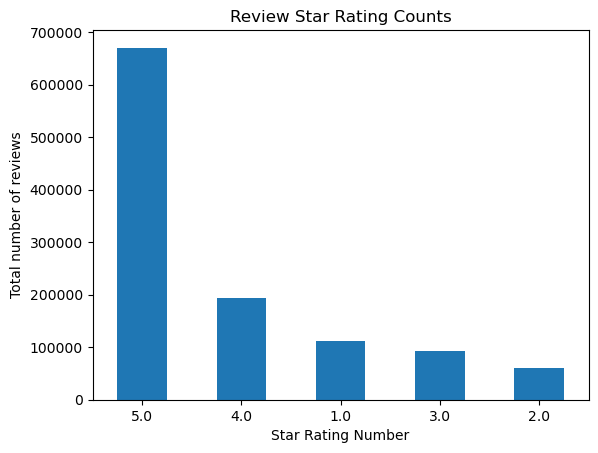

In [45]:
amazon_reviews["star_rating"].value_counts().plot(kind="bar", 
                                                  title="Review Star Rating Counts", 
                                                  xlabel="Star Rating Number", 
                                                  ylabel="Total number of reviews")
plt.xticks(rotation=0)
plt.show()


As shown by our previous mean computations, the number of reviews who have a star rating of >= 4 make the majority of the dataset, which accounts for the bias in positive sentiments.

# Bar graph of total number of reviews for each sentiment label category

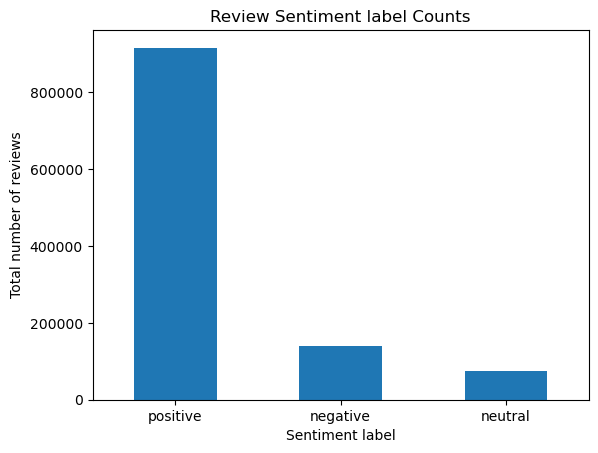

In [46]:
amazon_reviews["review_body_sentiment_label"].value_counts().plot(kind="bar", 
                                                  title="Review Sentiment label Counts", 
                                                  xlabel="Sentiment label", 
                                                  ylabel="Total number of reviews")
plt.xticks(rotation=0)
plt.show()

Once again, the positive bias in the reviews of the dataset is confirmed and the star rating is tied with the compound score and its associated sentiment label.

# Is there a linear relationship between star rating and the compounding sentiment score?
In order to answer this question, we can make a quick scatterplot between star rating and compound score. However, this would be the naive and incorrect way of doing it, because the star rating is a discrete variable currently (ranging from 1.0-5.0, as whole numbers only). It can't be used on the y-axis, because we need a continous variable to make a meaningful inference.

In order to address the drawback on the star rating column, we can normalize/transform it to a continous variable by finding the product between the star rating and the compound score. This product should provide a new series/vector of floating point numbers that range from -5 to 5. We can consider -5 as highly negative and 5 as highly positive, as a general rule of thumb for interpreting this new normalized star rating.

A plot can be made of normalized star rating vs compound sentiment score now

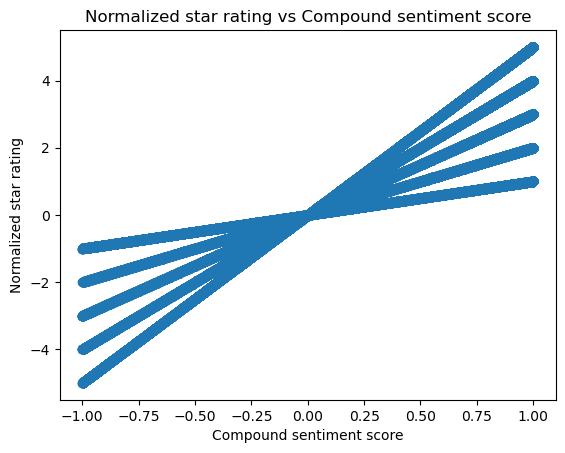

In [47]:
normalized_star_rating = amazon_reviews["star_rating"] * amazon_reviews["review_body_compound_score"]
compound_sentiment_scores = amazon_reviews["review_body_compound_score"]

plt.scatter(x=compound_sentiment_scores, y=normalized_star_rating)
plt.title("Normalized star rating vs Compound sentiment score")
plt.xlabel("Compound sentiment score")
plt.ylabel("Normalized star rating")

plt.show()

There does seem to be a positive, linear relationship between the normalized star rating and the compound score. The plot currently has some interesting gimmicks, which makes it seem like a two-sided fork centred around the convergence point of (0,0).

What does the (0,0) origin convergence point represent in this context?: That is the point of neutrality in the sentiments of the reviews, as a 0.00 compounding score lies in the acceptable neutral range, according to the Vader documentation. When the product is being computed at the origin, it is likely multiplying many star ratings of around 3.5 (the neutral range we discovered from the mean aggregation table earlier), by something in the range of -0.05 < compound_score < 0.05, leading to a large clustering of points in that region.

Further analysis of things such as slope, intercept and p-value will be done during the machine learning portion of our analysis in this project to address this regression problem.

# Measuring token/word frequencies in the normalized review bodies from the NLP pipeline
We are going to use the word cloud library to generate images of highly occuring words/tokens in the normalized_review_body column of the dataset. This can allow us to see if different groups of data, according to the sentiment label have meaningful words that give it that label in the first place.

In a wordcloud image, words are representing with different colors and font sizes. The larger the font size, the more prevalent/frequent that word occured in the corpus of data you have obtained.

# Helper function for fitting a wordcloud from a general pandas dataframe
Since the series which contains the normalized reviews is a bunch of strings, we can split them all by the space character to get a series of arrays of string tokens. Once we have done the splitting to get the tokens, we can explode that series and get an extended list of every single token that has been unflattened out of those subarrays. We can simply count the values, and pass that data to the fit_words method of an instance of the WordCloud class from the library.

In [48]:
def fit_word_cloud(reviews_df: pd.DataFrame) -> WordCloud :
    split_review_words = reviews_df["normalized_review_body"].str.split(" ")
    exploded_review_words = split_review_words.explode()
    review_word_counts = exploded_review_words.value_counts()

    return WordCloud().fit_words(review_word_counts)
    

# Word cloud on all the normalized review bodies

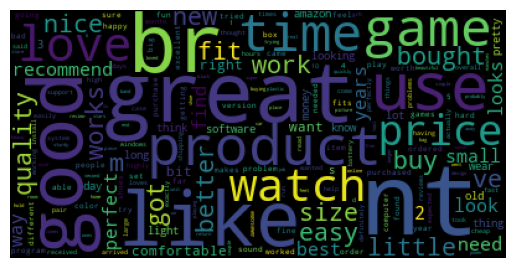

In [49]:
all_reviews_wc = fit_word_cloud(amazon_reviews)

plt.imshow(all_reviews_wc)
plt.axis("off")
plt.show()

There are definitely some meaningful words that not only relate to sentiments, but also words a human would type pretty commonly, when leaving a review for any product that they have purchased on Amazon.

Keywords include good, like, bought, works, perfect, great and easy.

# Word clouds of the normalized review bodies belonging to each sentiment label category

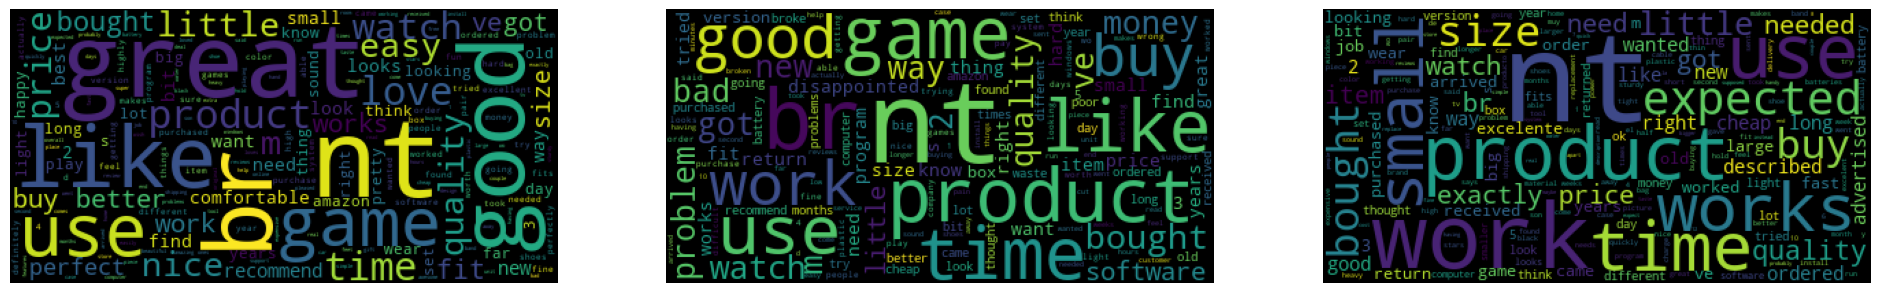

In [50]:
positive_reviews = amazon_reviews[amazon_reviews["review_body_sentiment_label"] == "positive"]
negative_reviews = amazon_reviews[amazon_reviews["review_body_sentiment_label"] == "negative"]
neutral_reviews = amazon_reviews[amazon_reviews["review_body_sentiment_label"] == "neutral"]

positive_wc = fit_word_cloud(positive_reviews)
negative_wc = fit_word_cloud(negative_reviews)
neutral_wc = fit_word_cloud(neutral_reviews)
fig, axs = plt.subplots(1, 3, figsize=(24, 4))

axs[0].imshow(positive_wc)
axs[0].axis("off")

axs[1].imshow(negative_wc)
axs[1].axis("off")

axs[2].imshow(neutral_wc)
axs[2].axis("off")

plt.show()

Positive keywords: good, great, perfect, love, quality

Negative keywords: disappointed, problem, time, money

Neutral keywords: works, expected, bought, described